Polar plotting

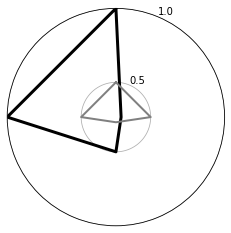

In [45]:
theta = np.radians([0,90, 180, 270, 0])
r = [1.0,0.3, 0.5, 1.0, 1.0]

theta2 = np.radians([0,90, 180, 270, 0])
r2 = [0.5,0.5, 0.3, 0.5, 0.5]

fig, axes = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(polar=True))

# Because default is 0 pointing to east, we want 0 at north.
axes.set_theta_zero_location('N')
# Default is ccw, we want cw
axes.set_theta_direction(-1)

# How often to show the 0 ... 1.0 gradation in r values.
axes.set_yticks([])
axes.set_xticks([])
# If you want to turn on / off the gray scaling circles and r grids
axes.grid(True)

p = axes.plot(theta, r, color='black', ls='-', linewidth=3)
p2 = axes.plot(theta2, r2, color='gray', ls='-', linewidth=2)
#p[0].MarkerSize = 10
# So enclosed region is grey instead of blank / white.
#ax.fill(theta,r,'0.75')

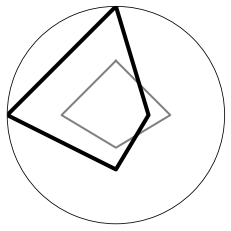

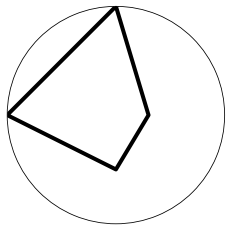

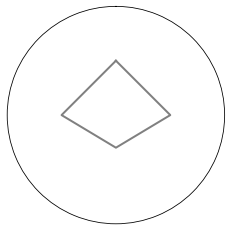

In [63]:
import matplotlib.pyplot as plt
import numpy as np 

# Inputs
theta = np.radians([0,90, 180, 270])
r = [1.0,0.3, 0.5, 1.0]

theta2 = np.radians([0,90, 180, 270])
r2 = [0.5,0.5, 0.3, 0.5]

theta3 = np.radians([0,90, 180, 270])
r3 = [0.4,0.4, 0.4, 0.4]

def polar_plot(ax, theta, r, color='black', linewidth = 2):
    """
    - theta - in radians
    - r - [0,1.0]. same size as theta
    - color - E.g. 'black'. The line color
    - linewidth - thickness of polar plot line.
    """
    # Need to re-add the first point so the polygon closes.
    theta = np.append(theta, theta[0])
    r = np.append(r, r[0])

    p = ax.plot(theta, r, color=color, ls='-', linewidth=linewidth)
    #p[0].MarkerSize = 10
    # So enclosed region is grey instead of blank / white.
    #ax.fill(theta,r,'0.75')

    # Because default is 0 pointing to east, we want 0 at north.
    ax.set_theta_zero_location('N')
    # Default is ccw, we want cw
    ax.set_theta_direction(-1)

    ax.set_xticks([])
    # How often to show the 0 ... 1.0 gradation in r values.
    # Have to set y ticks, or the 
    ax.set_yticks([0,1.0])
    ax.get_yaxis().set_visible(False)
    # If you want to turn on / off the gray scaling circles and r grids
    ax.grid(True)
    
    # rmax has to be set after plotting. See https://stackoverflow.com/questions/54653423/matplotlib-set-rmax-and-set-rticks-not-working
    ax.set_rmax(1.0)

fig, axes = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(polar=True))
polar_plot(axes, theta2, r2, color='grey', linewidth=2)
#polar_plot(axes, theta3, r3, color='grey', linewidth=2)
polar_plot(axes, theta, r, color='black', linewidth=4)

fig, axes = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(polar=True))
polar_plot(axes, theta, r, color='black', linewidth=4)
#fig, axes = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(polar=True))
#polar_plot(axes, theta3, r3, color='grey', linewidth=2)
fig, axes = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(polar=True))
polar_plot(axes, theta2, r2, color='grey', linewidth=2)

Brain area chart

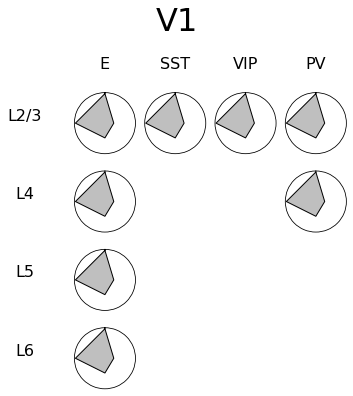

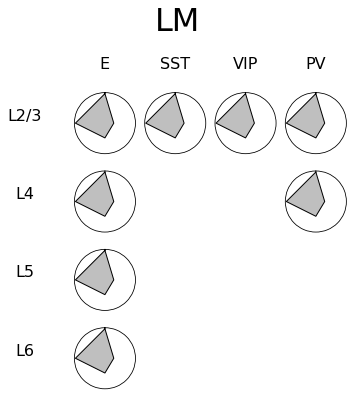

In [9]:
def plot_brain_area_chart(brain_area, layers, celltypes, polar_data):
    """
    - brain_area (string): e.g. 'V1'
    - layers (string[]): Order of layers, where each row = 1 layer. E.g. 'L2/3'
    - celltypes {string[]}: Order of columns, where each column = 1 celltype. E.g. 'SST'
    - polar_data ({(layer, celltype) -> (angle in degree, intensity)[]}}:
        E.g. {('L1', 'SST') -> [(90, 1.0), (270, 0.5)]}
    """
    fig, axes = plt.subplots(nrows=len(layers), ncols=len(celltypes), figsize=(5,5), subplot_kw=dict(polar=True))
    fig.suptitle(brain_area, fontsize=32, y = 1.1)
    
    for ax, celltype in zip(axes[0], celltypes):
        ax.set_title(celltype, fontsize=16, y = 1.3)

    for ax, layer in zip(axes[:,0], layers):
        ax.set_ylabel(layer, rotation=0, fontsize=16, labelpad = 50)
    
    for ax in axes.flatten():
        ax.axis('off')
    
    for (layer, celltype) in polar_data:
        # Get the axis given layer and celltype, then plot
        layer_id = layers.index(layer)
        celltype_id = celltypes.index(celltype)
        theta, r = zip(*polar_data[(layer, celltype)]) 
        theta = np.radians(theta)
        ax = axes[layer_id, celltype_id]
        ax.axis('on')
        polar_plot(ax, theta, r)
        
    fig.tight_layout()

mock_polar_data = [
    (0, 1.0),
    (90,0.3),
    (180,0.5),
    (270,1.0)
]
    
mock_data = {
    ('L2/3', 'E'): mock_polar_data,
    ('L2/3', 'SST'): mock_polar_data,
    ('L2/3', 'VIP'): mock_polar_data,
    ('L2/3', 'PV'): mock_polar_data,
    ('L4', 'E'): mock_polar_data,
    ('L4', 'PV'): mock_polar_data,
    ('L5', 'E'): mock_polar_data,
    ('L6', 'E'): mock_polar_data,
}

plot_brain_area_chart(
    brain_area = 'V1',
    layers = ['L2/3', 'L4', 'L5', 'L6'],
    celltypes = ['E', 'SST', 'VIP', 'PV'],
    polar_data = mock_data
)

plot_brain_area_chart(
    brain_area = 'LM',
    layers = ['L2/3', 'L4', 'L5', 'L6'],
    celltypes = ['E', 'SST', 'VIP', 'PV'],
    polar_data = mock_data
)
    

Filtered dataframe rows to polar_data

In [83]:
import pandas as pd
def cell_df_to_avg_polar(cell_df):
    """
    Input:
    - cell_df (DataFrame) - each row is one cell. columns = [angle, magnitude].
    TODO(sjoe): Pick the right df column names, and update angle and magnitude
    Output:
    - list<(angle in degree, avg intensity for this angle)>
    """
    grouped_df = cell_df.groupby('angle').mean()
    result = []
    for index, row in grouped_df.iterrows():
        result.append((index, row['magnitude']))
    return result
cell_dict = [
    {'angle': 180, 'magnitude': 0.0},
    {'angle': 180, 'magnitude': 1.0},
    {'angle': 90, 'magnitude': 0.0},
    {'angle': 90, 'magnitude': 1.0},
    {'angle': 270, 'magnitude': 1.0}
]

df = pd.DataFrame(cell_dict)
cell_df_to_avg_polar(df)

[(90, 0.5), (180, 0.5), (270, 1.0)]